In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [8]:
# Replace with your actual dataset
df = pd.read_csv('Customer_support_data.csv')
df.head()


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [52]:
df.info()
df.describe()
df.isnull().sum()

# Drop or fill missing values
df.ffill(inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         85907 non-null  object 
 5   Order_id                 85907 non-null  object 
 6   order_date_time          85907 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            85907 non-null  object 
 11  Product_category         85907 non-null  object 
 12  Item_price               85907 non-null  float64
 13  connected_handling_time  85907 non-null  float64
 14  Agent_name            

In [15]:
df_numeric = df.select_dtypes(include=[np.number])


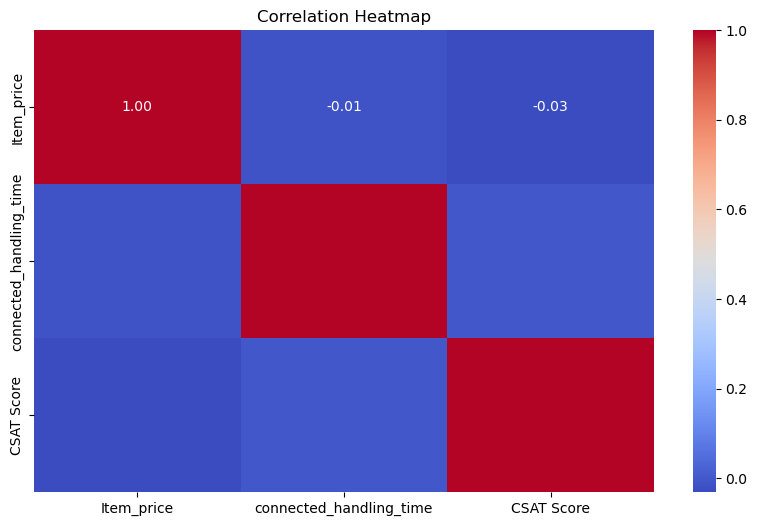

In [44]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [53]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Make a copy of the dataset (optional)
df_encoded = df.copy()

# Encode all categorical (object or string) columns
label_encoder = LabelEncoder()
for col in df_encoded.select_dtypes(include=['object']).columns:
    try:
        df_encoded[col] = label_encoder.fit_transform(df_encoded[col])
    except Exception as e:
        print(f"Encoding failed for column: {col}. Error: {e}")

# Check that 'CSAT Score' column exists before proceeding
if 'CSAT Score' not in df_encoded.columns:
    raise KeyError("The target column 'CSAT Score' was not found in the dataset.")

# Split features and target
X = df_encoded.drop('CSAT Score', axis=1)
y = df_encoded['CSAT Score']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [55]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [56]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

# Fix the warning by using zero_division
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           1       0.40      0.01      0.01      2241
           2       0.00      0.00      0.00       227
           3       0.00      0.00      0.00       503
           4       0.20      0.00      0.00      2277
           5       0.70      1.00      0.82     11934

    accuracy                           0.69     17182
   macro avg       0.26      0.20      0.17     17182
weighted avg       0.56      0.69      0.57     17182

Confusion Matrix:
 [[   17     0     0     2  2222]
 [    1     0     0     0   226]
 [    3     0     0     0   500]
 [    3     0     0     2  2272]
 [   18     0     0     6 11910]]


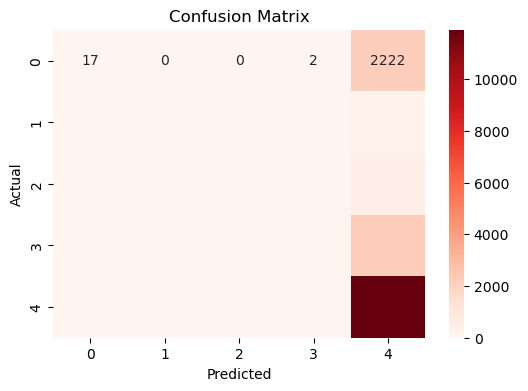

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


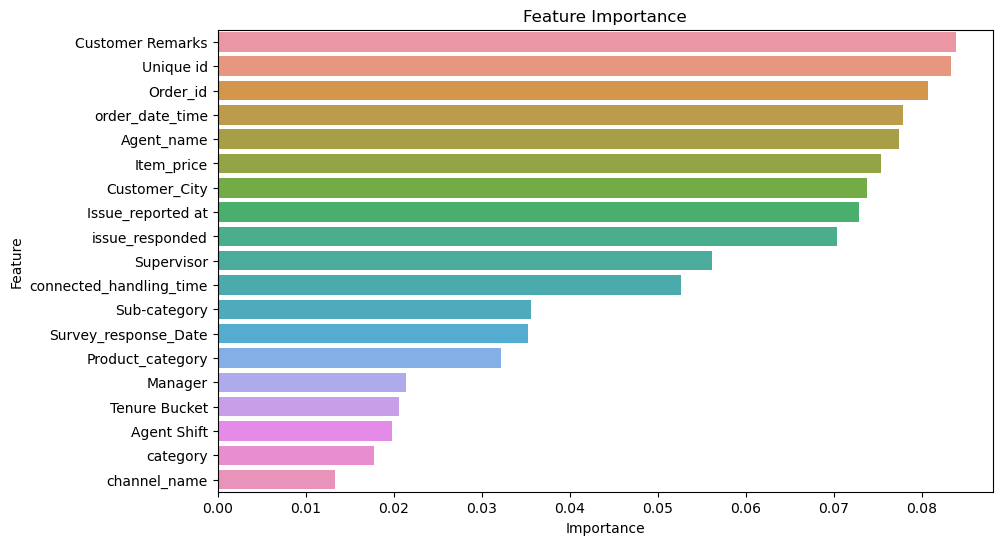

In [43]:
import numpy as np

importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [49]:
from sklearn.metrics import accuracy_score

# Predict using the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 69.43%


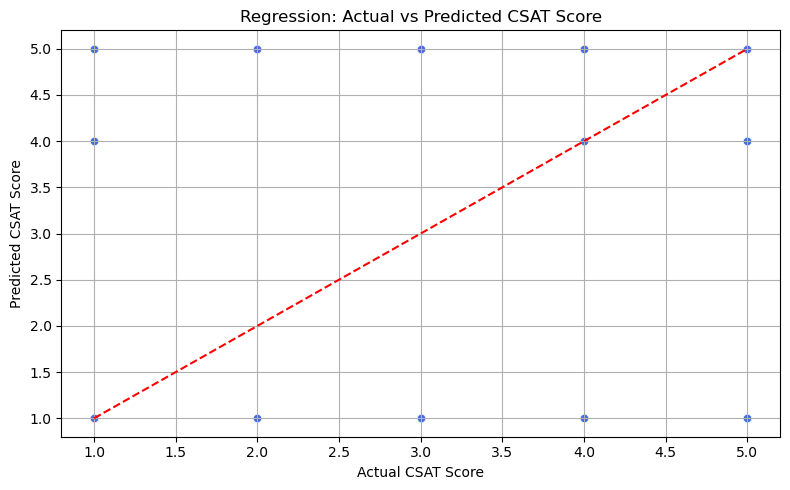

In [58]:
#Actual vs Predicted CSAT (Scatter Plot)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # reference line
plt.xlabel("Actual CSAT Score")
plt.ylabel("Predicted CSAT Score")
plt.title("Regression: Actual vs Predicted CSAT Score")
plt.grid(True)
plt.tight_layout()
plt.show()


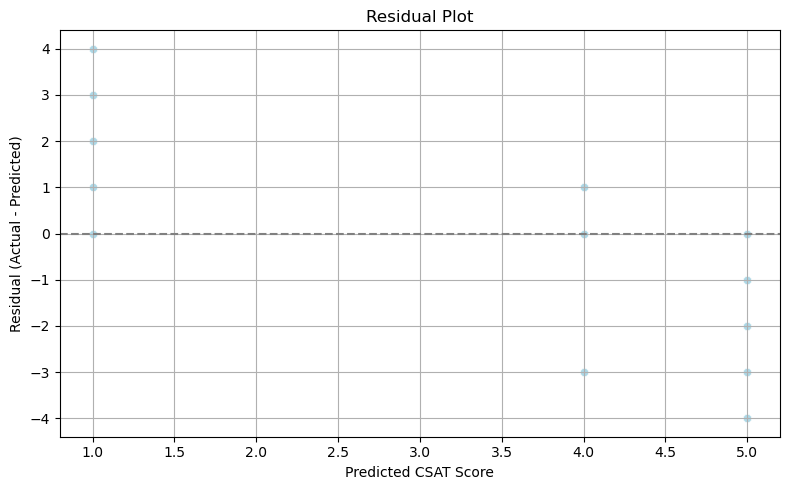

In [66]:
#Residual Plot (Error vs Prediction)
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals, color='lightblue')
plt.axhline(0, linestyle='--', color='gray')
plt.xlabel("Predicted CSAT Score")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residual Plot")
plt.grid(True)
plt.tight_layout()
plt.show()


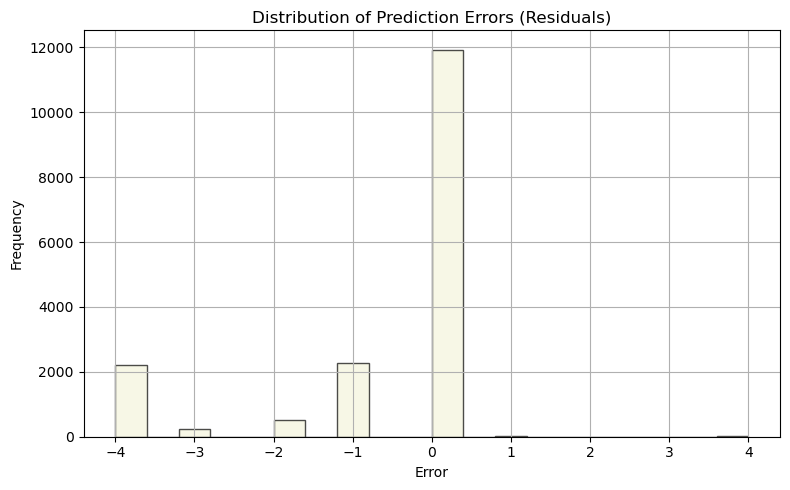

In [70]:
#Histogram of Prediction Errors
import numpy as np
import matplotlib.pyplot as plt

# Safely clean residuals
residuals = y_test - y_pred
residuals = np.array(residuals)
residuals = residuals[~np.isnan(residuals) & ~np.isinf(residuals)]  # remove NaN and inf

# Plot using matplotlib
plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=20, color='beige', edgecolor='black', alpha=0.7)
plt.title("Distribution of Prediction Errors (Residuals)")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()




In [71]:
#R² Score and RMSE Summary
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")


R² Score: -0.300
RMSE: 1.567
